In [1]:
import os
import time
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import sklearn

In [2]:
# Setup variables
samplerate = 44100
sample_len = 2*samplerate
n_mfcc = 13
hop_len = 512
segment_len = int(np.ceil(sample_len/hop_len))
mfcc_len = segment_len
spectral_bandwidth_len = segment_len
spectral_flatness_len = 1
feature_len = mfcc_len*n_mfcc + spectral_bandwidth_len + spectral_flatness_len
feature_reduced_len = mfcc_len*2 + spectral_bandwidth_len + spectral_flatness_len
print("Full feature size: %i" % feature_len)
print("Reduced feature size: %i" % feature_reduced_len)

Full feature size: 2423
Reduced feature size: 520


In [3]:
#get audio files
fileswchorus = os.listdir('./DataSet/Samples/Chorus')
fileswdistortion = os.listdir('./DataSet/Samples/Distortion')
filesweq = os.listdir('./DataSet/Samples/EQ')
fileswdelay = os.listdir('./DataSet/Samples/FeedbackDelay')
fileswflanger = os.listdir('./DataSet/Samples/Flanger')
fileswnofx = os.listdir('./DataSet/Samples/NoFX')

#calc number of samples
n_data = len(fileswchorus)+len(fileswdistortion)+len(filesweq)+len(fileswdelay)+len(fileswflanger)+len(fileswnofx)
print("Number of samples: %i" % n_data)

#setup classes
labels = np.zeros(n_data)
classes = ['Chorus','Distortion','EQ','FeedbackDelay','Flanger','NoFX']

Number of samples: 9360


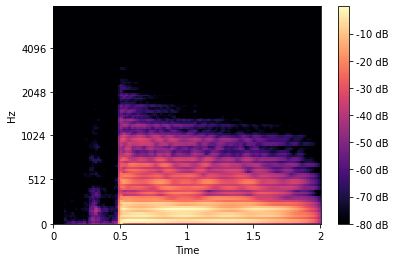

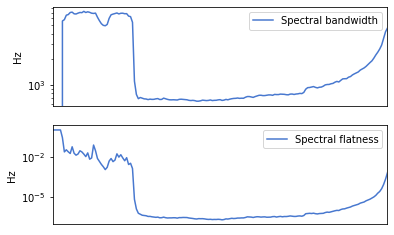

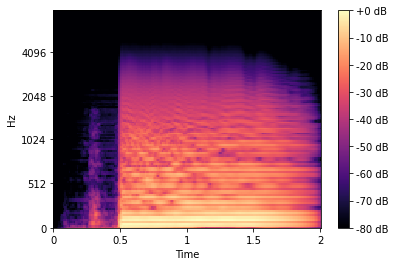

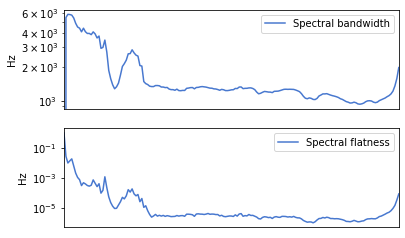

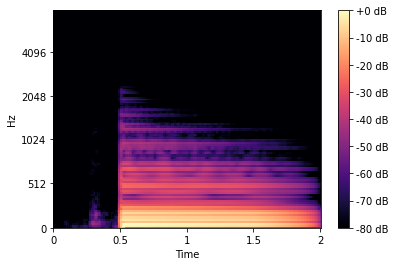

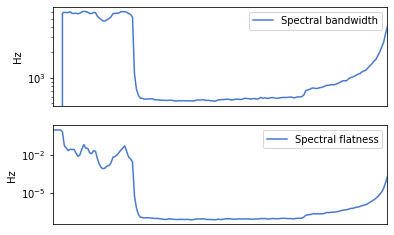

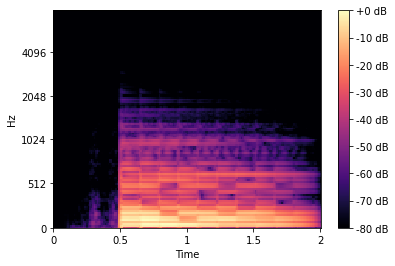

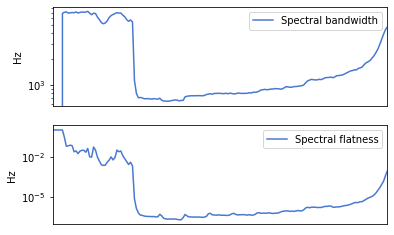

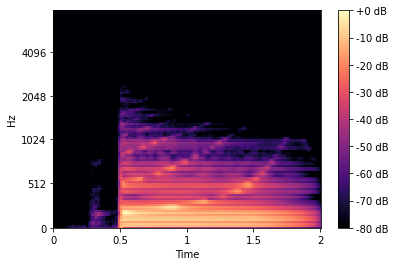

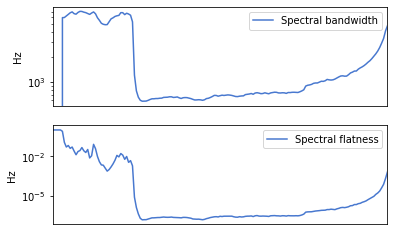

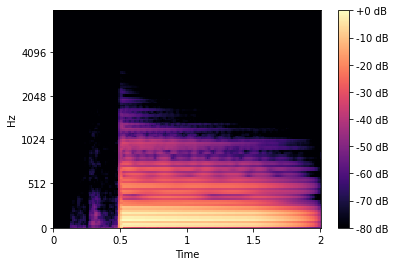

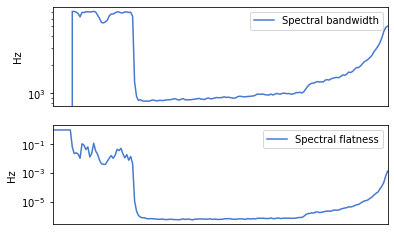

In [13]:
sr = samplerate
def extract_features(filename):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    #mfccs = librosa.feature.mfcc(signal, samplerate, n_mfcc=n_mfcc, hop_length=hop_len)
    S = librosa.feature.melspectrogram(signal, samplerate)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    spec_bw = librosa.feature.spectral_bandwidth(signal, samplerate)
    spec_flt = librosa.feature.spectral_flatness(signal)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer()
    ax[1].semilogy(times, spec_flt[0], label='Spectral flatness')
    ax[1].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[1].legend()
    ax[1].label_outer()


extract_features('./DataSet/Samples/Chorus/' + fileswchorus[0])

extract_features('./DataSet/Samples/Distortion/' + fileswdistortion[0])

extract_features('./DataSet/Samples/EQ/' + filesweq[0])

extract_features('./DataSet/Samples/FeedbackDelay/' + fileswdelay[0])

extract_features('./DataSet/Samples/Flanger/' + fileswflanger[0])

extract_features('./DataSet/Samples/NoFX/' + fileswnofx[0])